In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("dataset.csv")
print("✅ Dataset Loaded!")

✅ Dataset Loaded!


In [2]:
print("\n🧾 Dataset Info:")
print(df.info())


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1000 non-null   object
 1   Num_Children           1000 non-null   int64 
 2   Food_Remaining (kg)    1000 non-null   int64 
 3   Daily_Need (kg)        1000 non-null   int64 
 4   Food_Used (kg)         1000 non-null   int64 
 5   Donation_Amount (Tsh)  1000 non-null   int64 
 6   Expense_Total (Tsh)    1000 non-null   int64 
 7   Budget_Left (Tsh)      1000 non-null   int64 
 8   Food_Shortage (kg)     1000 non-null   int64 
 9   Suggested_Purchase     548 non-null    object
 10  Quantity_To_Buy        1000 non-null   int64 
 11  Estimated_Cost (Tsh)   1000 non-null   int64 
 12  Emergency_Event        314 non-null    object
 13  Medical_Treatment      829 non-null    object
 14  Medical_Cost           1000 non-null   int64 
 15  Utili

In [3]:
print("\n📊 Summary Statistics:")
print(df.describe())

# Step 3: Check for missing values
print("\n🕳️ Missing Values:")
print(df.isnull().sum())


📊 Summary Statistics:
       Num_Children  Food_Remaining (kg)  Daily_Need (kg)  Food_Used (kg)  \
count   1000.000000          1000.000000      1000.000000     1000.000000   
mean      59.816000            54.574000        59.816000       20.122000   
std       23.489527            26.442309        23.489527       10.185424   
min       20.000000            10.000000        20.000000        5.000000   
25%       39.000000            31.000000        39.000000       11.000000   
50%       60.000000            55.000000        60.000000       19.000000   
75%       80.000000            77.000000        80.000000       29.000000   
max      100.000000           100.000000       100.000000       40.000000   

       Donation_Amount (Tsh)  Expense_Total (Tsh)  Budget_Left (Tsh)  \
count            1000.000000          1000.000000        1000.000000   
mean            73413.798000         68349.882000        5063.916000   
std             43334.808771         29138.629316       51429.75163

In [4]:
# Step 4: Fill or drop missing values
df.fillna({
    "Medical_Treatment": "None",
    "Suggested_Purchase": "None",
    "Notes": "Stable"
}, inplace=True)

df.fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4796\3700192039.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


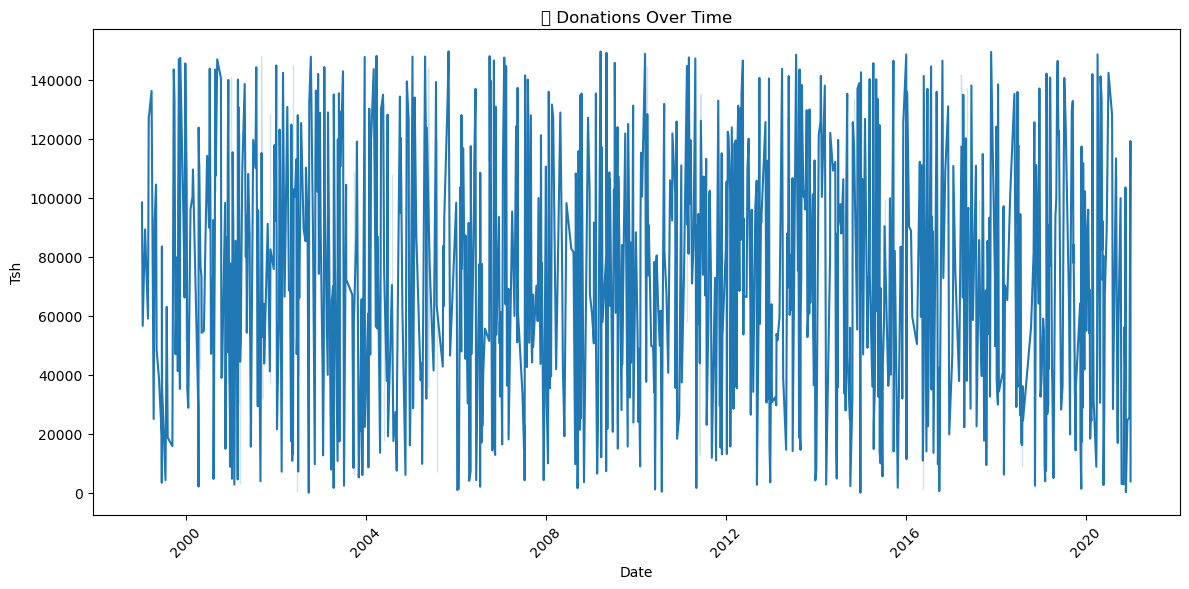

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


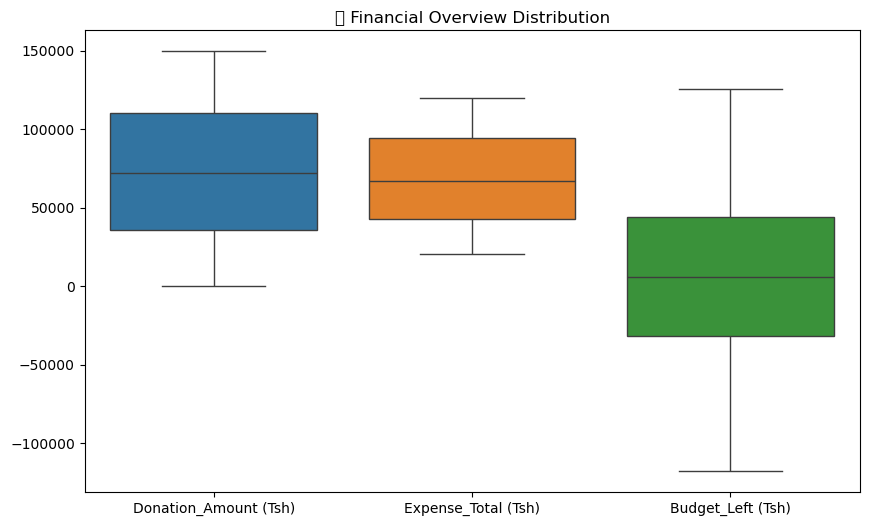

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


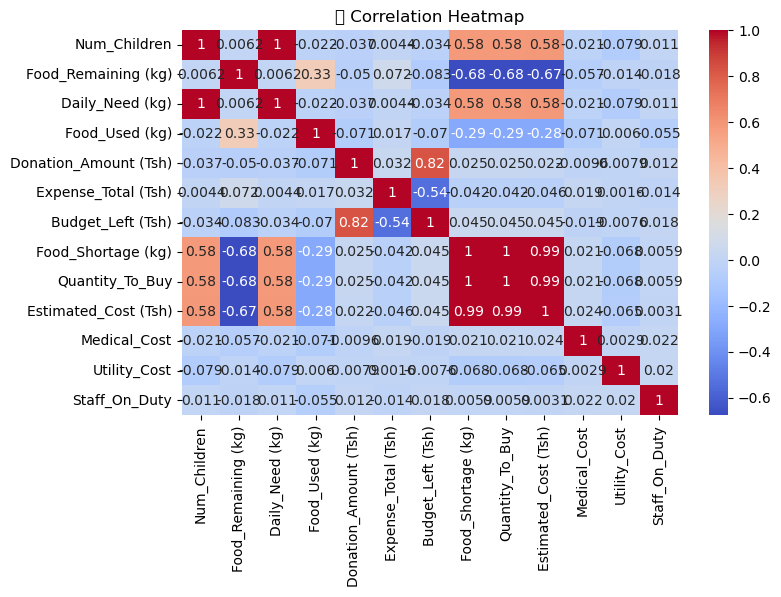

In [5]:
# Step 5: Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 6: Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Donation_Amount (Tsh)")
plt.title("📈 Donations Over Time")
plt.ylabel("Tsh")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Donation_Amount (Tsh)', 'Expense_Total (Tsh)', 'Budget_Left (Tsh)']])
plt.title("💰 Financial Overview Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("🔥 Correlation Heatmap")
plt.show()

In [8]:
# Encode target label: Suggested_Purchase safely
label_encoder = LabelEncoder()
df['Suggested_Purchase'] = df['Suggested_Purchase'].astype(str)
df['Suggested_Purchase_Label'] = label_encoder.fit_transform(df['Suggested_Purchase'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load your data
df = pd.read_csv('dataset.csv')  # Replace with your actual dataset path

# Step 2: Handle Missing Data
# Fill only numeric columns with mean values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 3: Feature Engineering
df['Food_Per_Child'] = df['Food_Used'] / (df['Num_Children'] + 1)
df['Donation_Per_Child'] = df['Donation_Amount'] / (df['Num_Children'] + 1)
df['Budget_Per_Child'] = df['Budget_Left'] / (df['Num_Children'] + 1)
df['Food_Donation_Ratio'] = df['Food_Used'] / (df['Donation_Amount'] + 1)
df['Budget_Food_Ratio'] = df['Budget_Left'] / (df['Food_Used'] + 1)

# Step 4: Features and Target
features = [
    'Num_Children', 'Food_Remaining', 'Daily_Need', 'Food_Used',
    'Donation_Amount', 'Expense_Total', 'Budget_Left', 
    'Medical_Cost', 'Utility_Cost', 'Staff_On_Duty', 
    'Food_Per_Child', 'Donation_Per_Child', 'Budget_Per_Child',
    'Food_Donation_Ratio', 'Budget_Food_Ratio'
]
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target label
y = df['Suggested_Purchase']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 6: Model Training with Grid Search
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 7: Evaluation
y_pred = best_model.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 8: Cross-Validation
cv_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5)
print("\n📈 Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Step 9: Predict on New Test Dataset
test_data = pd.read_csv('your_test_dataset.csv')  # Replace with your test set path

# Fill missing values for test set
test_data[numeric_cols] = test_data[numeric_cols].fillna(df[numeric_cols].mean())

# Apply same feature engineering
test_data['Food_Per_Child'] = test_data['Food_Used'] / (test_data['Num_Children'] + 1)
test_data['Donation_Per_Child'] = test_data['Donation_Amount'] / (test_data['Num_Children'] + 1)
test_data['Budget_Per_Child'] = test_data['Budget_Left'] / (test_data['Num_Children'] + 1)
test_data['Food_Donation_Ratio'] = test_data['Food_Used'] / (test_data['Donation_Amount'] + 1)
test_data['Budget_Food_Ratio'] = test_data['Budget_Left'] / (test_data['Food_Used'] + 1)

X_test_final = test_data[features]
X_test_final_scaled = scaler.transform(X_test_final)

# Predict
test_preds = best_model.predict(X_test_final_scaled)
test_preds_labels = label_encoder.inverse_transform(test_preds)
print("\n🧾 Predictions for Test Data:")
print(test_preds_labels)


✅ BROOOOO SUPER AI DATA CREATED 🔥 Let’s go hit that 80+ accuracy 🚀📈


In [16]:
print(df.columns)


Index(['Date', 'Num_Children', 'Food_Remaining', 'Daily_Need', 'Food_Used',
       'Donation_Amount', 'Expense_Total', 'Budget_Left', 'Food_Shortage',
       'Suggested_Purchase', 'Quantity_To_Buy', 'Estimated_Cost',
       'Emergency_Event', 'Medical_Treatment', 'Medical_Cost', 'Utility_Type',
       'Utility_Cost', 'Staff_On_Duty', 'Notes', 'Food_Per_Child',
       'Donation_Per_Child', 'Budget_Per_Child', 'Cost_Per_Child',
       'Food_Shortage_Per_Child', 'Remaining_Days_Covered', 'Emergency_Flag',
       'Medical_Flag', 'High_Utility_Cost', 'Year', 'Month'],
      dtype='object')
